In [1]:
from Config import Config, plot_rewards, print_cfgs
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import DoubleDQN
import d2l.torch as d2l
import torch

Hyperparameters:
        Name        	       Value        	        Type        
     algo_name      	     DoubleDQN      	   <class 'str'>    
      env_name      	   LunarLander-v2   	   <class 'str'>    
        seed        	        4321        	   <class 'int'>    
     train_eps      	        500         	   <class 'int'>    
      test_eps      	         20         	   <class 'int'>    
     max_steps      	        1000        	   <class 'int'>    
  eval_per_episode  	         10         	   <class 'int'>    
      eval_eps      	         10         	   <class 'int'>    
       gamma        	        0.99        	  <class 'float'>   
         lr         	       0.0005       	  <class 'float'>   
   epsilon_start    	        0.95        	  <class 'float'>   
    epsilon_end     	        0.05        	  <class 'float'>   
   epsilon_decay    	        500         	   <class 'int'>    
    buffer_size     	       10000        	   <class 'int'>    
     batch_size     	        128      

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


开始更新策略！
回合：10/500，奖励：-355.89，评估奖励：-533.83，最佳评估奖励：-533.83，更新模型！ 0.20
回合：20/500，奖励：-421.44，评估奖励：-548.63，最佳评估奖励：-533.83，0.09
回合：30/500，奖励：15.76，评估奖励：-502.79，最佳评估奖励：-502.79，更新模型！ 0.06
回合：40/500，奖励：-841.44，评估奖励：-656.74，最佳评估奖励：-502.79，0.05
回合：50/500，奖励：-34.88，评估奖励：-118.65，最佳评估奖励：-118.65，更新模型！ 0.05
回合：60/500，奖励：-306.61，评估奖励：-139.40，最佳评估奖励：-118.65，0.05
回合：70/500，奖励：-541.14，评估奖励：-131.59，最佳评估奖励：-118.65，0.05
回合：80/500，奖励：-264.14，评估奖励：-126.61，最佳评估奖励：-118.65，0.05
回合：90/500，奖励：-112.23，评估奖励：-138.83，最佳评估奖励：-118.65，0.05
回合：100/500，奖励：-111.44，评估奖励：-142.45，最佳评估奖励：-118.65，0.05
回合：110/500，奖励：-173.48，评估奖励：-122.78，最佳评估奖励：-118.65，0.05
回合：120/500，奖励：-125.83，评估奖励：-126.52，最佳评估奖励：-118.65，0.05
回合：130/500，奖励：-387.82，评估奖励：-77.65，最佳评估奖励：-77.65，更新模型！ 0.05
回合：140/500，奖励：-114.28，评估奖励：-135.49，最佳评估奖励：-77.65，0.05
回合：150/500，奖励：-137.58，评估奖励：-142.78，最佳评估奖励：-77.65，0.05
回合：160/500，奖励：-142.53，评估奖励：-156.59，最佳评估奖励：-77.65，0.05
回合：170/500，奖励：-63.27，评估奖励：-883.56，最佳评估奖励：-77.65，0.05
回合：180/500，奖励：-139.09，评估奖励：-134.19，最佳评估奖励：-77.65，0.0

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/wyq/Workspace/AttentionRL/StateAttentionDDQN/Config.py:45: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, len(rewards), 10)  # 设置x轴的范围


回合：5/20，奖励：-141.00
回合：6/20，奖励：-111.41
回合：7/20，奖励：-128.44
回合：8/20，奖励：-197.65
回合：9/20，奖励：-114.43
回合：10/20，奖励：-178.13
回合：11/20，奖励：-142.58
回合：12/20，奖励：-143.08
回合：13/20，奖励：-105.95
回合：14/20，奖励：-138.38
回合：15/20，奖励：-119.84
回合：16/20，奖励：-88.52
回合：17/20，奖励：-121.73
回合：18/20，奖励：-150.49
回合：19/20，奖励：-45.55
回合：20/20，奖励：-102.64
完成测试


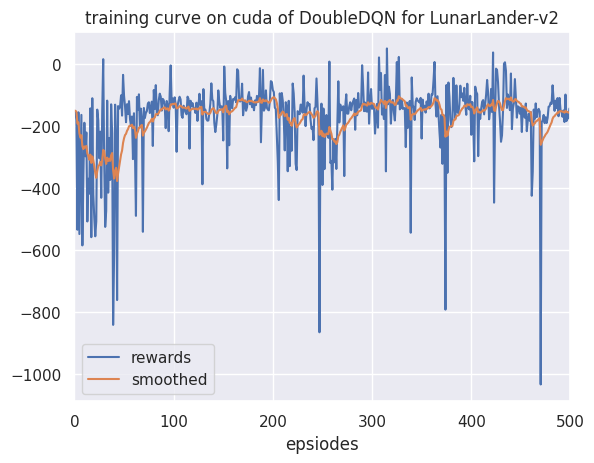

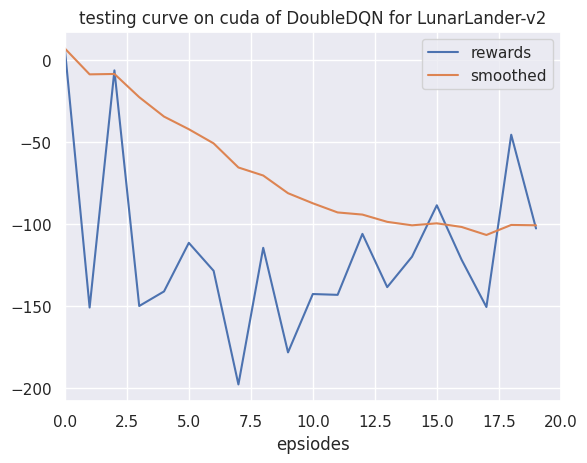

In [2]:
# 获取参数
cfg = Config() 
print_cfgs(cfg)
# 训练
env, agent = env_agent_config(cfg)
best_agent, res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], title=f"training curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], title=f"testing curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")

In [3]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.policy_net.train()
NUM_OF_TEST = 1
reward_list = []
action_list = []
q_value_list = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    # img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action, q_value = draw_agent.predict_action_returnQ(state)
        action_list.append(action)
        q_value_list.append(q_value)
        state, reward, done, _ = env.step(action)
        reward_list.append(reward)

        total_reward += reward
        # img.set_data(env.render(mode='rgb_array'))
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

draw_agent.policy_net.train()
print("length of actions is ", len(q_value_list))
for action, q_value, reward in zip(action_list, q_value_list, reward_list):
    print(action, q_value.cpu(), reward)
print(total_reward)

length of actions is  87
3 tensor([[376833.8125, 377222.1250, 385229.4688, 386084.5625]],
       grad_fn=<ToCopyBackward0>) 1.0597640342843146
3 tensor([[372956.8125, 373395.7812, 381207.4062, 382133.2812]],
       grad_fn=<ToCopyBackward0>) 1.4254748128746269
3 tensor([[375288.5938, 375802.5625, 383521.4062, 384574.0625]],
       grad_fn=<ToCopyBackward0>) 1.3845579970885933
3 tensor([[379616.6250, 380202.2812, 387889.8438, 389076.4688]],
       grad_fn=<ToCopyBackward0>) 1.4946217823524262
3 tensor([[383665.5625, 384319.7812, 391975.9375, 393287.6562]],
       grad_fn=<ToCopyBackward0>) 1.9944918747224574
3 tensor([[392008.3750, 392780.2500, 400416.1875, 401894.0000]],
       grad_fn=<ToCopyBackward0>) 1.892938200957418
3 tensor([[397623.1875, 398495.4688, 406077.9688, 407682.4062]],
       grad_fn=<ToCopyBackward0>) 1.0743998415899807
3 tensor([[403560.9062, 404536.5312, 412067.5625, 413802.4375]],
       grad_fn=<ToCopyBackward0>) 0.7550703446329987
3 tensor([[413595.2188, 414707.0

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1768, 0.0000, 0.0000]]]],
       grad_fn=<ToCopyBackward0>)

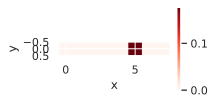

In [4]:
d2l.show_heatmaps(draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu()

In [5]:
# torch.save(best_agent, 'Data/CartPole-v1_DDQN_Noise/01-260-200-200.pt')